# Scikit-learn

Scikit-learn is a machine learning library for Python. It features several regression, classification and clustering algorithms including SVMs, gradient boosting, k-means, random forests and DBSCAN. It is designed to work with Python Numpy and SciPy.

- **Supervised Learning algorithms** − Almost all the popular supervised learning algorithms, like Linear Regression, Support Vector Machine (SVM), Decision Tree etc., are the part of scikit-learn.

- **Unsupervised Learning algorithms** − On the other hand, it also has all the popular unsupervised learning algorithms from clustering, factor analysis, PCA (Principal Component Analysis) to unsupervised neural networks.

- **Clustering** − This model is used for grouping unlabeled data.

- **Cross Validation** − It is used to check the accuracy of supervised models on unseen data.

- **Dimensionality Reduction** − It is used for reducing the number of attributes in data which can be further used for summarisation, visualisation and feature selection.

- **Ensemble methods** − As name suggest, it is used for combining the predictions of multiple supervised models.

- **Feature extraction** − It is used to extract the features from data to define the attributes in image and text data.

- **Feature selection** − It is used to identify useful attributes to create supervised models.

In [104]:
# import sklearn as skl

## Clustering

### KMeans
This algorithm computes the **centroids and iterates until it finds optimal centroid**. It requires the ***number of clusters*** to be specified that’s why it assumes that they are already known. The main logic of this algorithm is to cluster the data separating samples in n number of groups of equal variances by minimizing the criteria known as the inertia. The number of clusters identified by algorithm is represented by ‘K.

Scikit-learn have sklearn.cluster.KMeans module to perform K-Means clustering. While computing cluster centers and value of inertia, the parameter named sample_weight allows sklearn.cluster.KMeans module to assign more weight to some samples.


### Mean Shift
This algorithm mainly discovers blobs in a smooth **density of samples**. It assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints. Instead of relying on a parameter named bandwidth dictating the size of the region to search through, it automatically sets the number of clusters.

Scikit-learn have sklearn.cluster.MeanShift module to perform Mean Shift clustering.


### Spectral Clustering
Before clustering, this algorithm basically uses the **eigenvalues i.e. spectrum of the similarity matrix of the data to perform dimensionality reduction in fewer dimensions**. The use of this algorithm is not advisable when there are large number of clusters.

Scikit-learn have sklearn.cluster.SpectralClustering module to perform Spectral clustering.

### Hierarchical Clustering
This algorithm builds nested clusters by merging or splitting the clusters successively. This cluster hierarchy is represented as dendrogram i.e. tree. It falls into following two categories −

Agglomerative hierarchical algorithms − In this kind of hierarchical algorithm, every data point is treated like a single cluster. It then successively agglomerates the pairs of clusters. This uses the bottom-up approach.

Divisive hierarchical algorithms − In this hierarchical algorithm, all data points are treated as one big cluster. In this the process of clustering involves dividing, by using top-down approach, the one big cluster into various small clusters.

Scikit-learn have sklearn.cluster.AgglomerativeClustering module to perform Agglomerative Hierarchical clustering.

### DBSCAN
It stands for **“Density-based spatial clustering of applications with noise”**. This algorithm is based on the intuitive notion of “clusters” & “noise” that clusters are dense regions of the lower density in the data space, separated by lower density regions of data points.

Scikit-learn have sklearn.cluster.DBSCAN module to perform DBSCAN clustering. There are two important parameters namely min_samples and eps used by this algorithm to define dense.

Higher value of parameter min_samples or lower value of the parameter eps will give an indication about the higher density of data points which is necessary to form a cluster.

### OPTICS
It stands for “Ordering points to identify the clustering structure”. This algorithm also finds density-based clusters in spatial data. It’s basic working logic is like DBSCAN.

It addresses a major weakness of DBSCAN algorithm-the problem of detecting meaningful clusters in data of varying density-by ordering the points of the database in such a way that spatially closest points become neighbors in the ordering.

Scikit-learn have sklearn.cluster.OPTICS module to perform OPTICS clustering.

### BIRCH
It stands for Balanced iterative reducing and clustering using hierarchies. It is used to perform hierarchical clustering over large data sets. It builds a tree named CFT i.e. Characteristics Feature Tree, for the given data.

The advantage of CFT is that the data nodes called CF (Characteristics Feature) nodes holds the necessary information for clustering which further prevents the need to hold the entire input data in memory.

Scikit-learn have sklearn.cluster.Birch module to perform BIRCH clustering.


### Summary
<center> <img src="img/clust.png" width="800"/> </center>

<center> <img src="img/clust2.png" width="800"/> </center>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd  

%matplotlib nbagg 
colors = np.asarray(plt.cm.tab10.colors)

### Mean Shift

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a **centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region**. 

```

class sklearn.cluster.MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)[source]¶>

```

bandwidth
- **bandwidth** Bandwidth used in the RBF kernel. If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth; see the documentation for that function for hints on scalability (see also the Notes, below).

- **seedsarray** Seeds used to initialize kernels. If not set, the seeds are calculated by clustering.get_bin_seeds with bandwidth as the grid size and default values for other parameters.

- **bin_seeding** If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points, where points are binned onto a grid whose coarseness corresponds to the bandwidth. Setting this option to True will speed up the algorithm because fewer seeds will be initialized. The default value is False. Ignored if seeds argument is not None.

- **min_bin_freq** To speed up the algorithm, accept only those bins with at least min_bin_freq points as seeds.

- **cluster_all** If true, then all points are clustered, even those orphans that are not within any kernel. Orphans are assigned to the nearest kernel. If false, then orphans are given cluster label -1.

- **n_jobs** The number of jobs to use for the computation. The following tasks benefit from the parallelization: None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

- **max_iter** int, default=300. Maximum number of iterations, per seed point before the clustering operation terminates (for that seed point), if has not converged yet.

In [4]:
# obtain a matrix data from csv
data = np.genfromtxt('data/205.csv', delimiter=',')                                                     # build 2D projected data (on xy plane)
X = data[:, :3]### Mean Shift

<IPython.core.display.Javascript object>


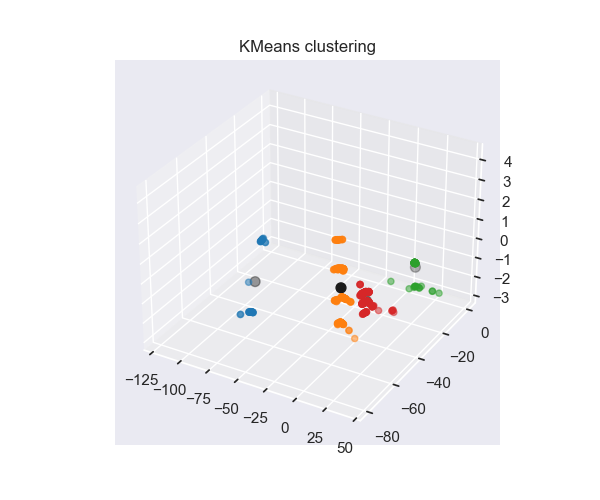

In [115]:
plt.figure(figsize=(6, 5))
ax = plt.axes(projection ="3d")
p = ax.scatter3D(X[:,0],X[:,1],X[:,2], alpha=0.5, s=10, c=data[:, 3], cmap='Reds') 
plt.colorbar(p)

### K-Means

The K-means clustering algorithm is a simple clustering algorithm that tries to identify the centre of each cluster. It does this by searching for a point which minimises the distance between the centre and all the points in the cluster. The algorithm needs to be told how many clusters to look for, but a common technique is to try different numbers of clusters and combine it with other tests to decide on the best combination.

***Advantages of K-Means***
- Simple algorithm, fast to compute. A good choice as the first thing to try when attempting to cluster data.
- Suitable for large datasets due to its low memory and computing requirements.

***Limitations of K-Means***
- Requires number of clusters to be known in advance
- Struggles when clusters have irregular shapes
- Will always produce an answer finding the required number of clusters even if the data isn’t clustered (or clustered in that many clusters).
- Requires linear cluster boundaries


```

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [5]:
# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)  

In [118]:
kmeans

KMeans(n_clusters=4)

In [138]:
# fit model
predicted_clusters_km = kmeans.fit_predict(X) 
cluster_centers = kmeans.cluster_centers_

<IPython.core.display.Javascript object>


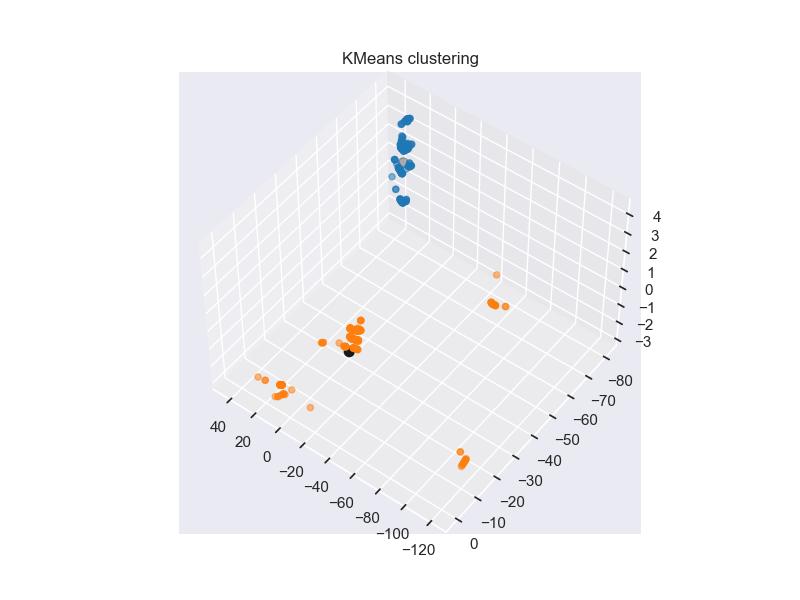

In [139]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0],X[:,1],X[:,2],alpha=0.5, s=20, c=colors[predicted_clusters_km])   
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='k', s=50, zorder=10)
plt.title("KMeans clustering")
plt.show()    

### Mean Shift

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a **centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region**. 

```

class sklearn.cluster.MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)[source]¶>

```

Parameters:
- **bandwidth** Bandwidth used in the RBF kernel. If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth; see the documentation for that function for hints on scalability (see also the Notes, below).

- **seedsarray** Seeds used to initialize kernels. If not set, the seeds are calculated by clustering.get_bin_seeds with bandwidth as the grid size and default values for other parameters.

- **bin_seeding** If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points, where points are binned onto a grid whose coarseness corresponds to the bandwidth. Setting this option to True will speed up the algorithm because fewer seeds will be initialized. The default value is False. Ignored if seeds argument is not None.

- **min_bin_freq** To speed up the algorithm, accept only those bins with at least min_bin_freq points as seeds.

- **cluster_all** If true, then all points are clustered, even those orphans that are not within any kernel. Orphans are assigned to the nearest kernel. If false, then orphans are given cluster label -1.

- **n_jobs** The number of jobs to use for the computation. The following tasks benefit from the parallelization: None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

- **max_iter** int, default=300. Maximum number of iterations, per seed point before the clustering operation terminates (for that seed point), if has not converged yet.

<IPython.core.display.Javascript object>


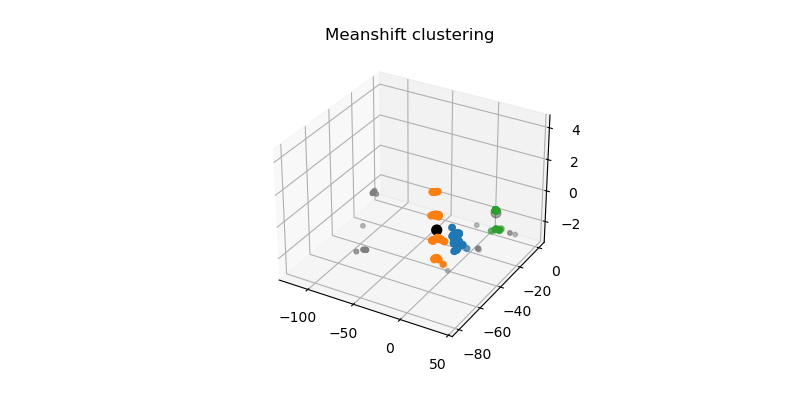

In [6]:
# meanshift clustering
from sklearn.cluster import MeanShift
meanshift = MeanShift(cluster_all=False, bin_seeding=True, min_bin_freq=20)  

# fit model
predicted_clusters_ms = meanshift.fit_predict(X) 
cluster_centers = meanshift.cluster_centers_

mask = predicted_clusters_ms != -1

plt.figure(figsize=(8, 4))
colors = np.asarray(plt.cm.tab10.colors)
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0],X[:,1],X[:,2],alpha=0.5, s=10, c='gray')   
ax.scatter3D(X[mask,0],X[mask,1],X[mask,2],alpha=0.5, s=20, c=colors[predicted_clusters_ms[mask]])   
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='k', s=50, zorder=10)
plt.title("Meanshift clustering")
plt.show()    

### DBSCAN

Density-Based Spatial Clustering of Applications with Noise. Finds core samples of **high density and expands clusters from them**. Good for data which contains clusters of similar density.

```

class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

```

DBSCAN clustering is performed using the DBSCAN module. This algorithm uses two crucial parameters to define density, namely min_samples and eps.

The greater the value of the parameter in samples or the lower the parameter value of the eps, the higher the density of data points required to form a cluster.

- **eps** float, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

- **min_samples** int, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

- **metric** str, or callable, default=’euclidean’
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

- **metric_params** dict, default=None
Additional keyword arguments for the metric function.

- **algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’**
The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

- **leaf_size** int, default=30
Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

- **p** float, default=None
The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2 (equivalent to the Euclidean distance).

- **n_jobs** int, default=None
The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

<IPython.core.display.Javascript object>


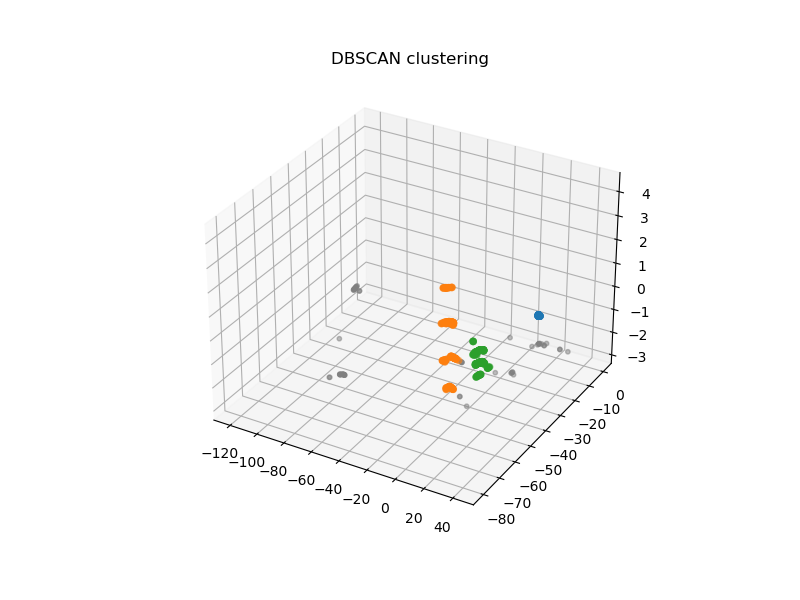

In [7]:
# DBSCAN clustring 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=20, n_jobs=1)     
predicted_clusters_db = dbscan.fit_predict(X)  # fit model and predict clusters

mask = predicted_clusters_db != -1

plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0],X[:,1],X[:,2],alpha=0.5, s=10, c='gray')   
ax.scatter3D(X[mask,0],X[mask,1],X[mask,2],alpha=0.5, s=20, c=colors[predicted_clusters_db[mask]])   
#ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='k', s=50, zorder=10)
plt.title("DBSCAN clustering")
plt.show()    

In [8]:
XX = np.tile(X, (200, 1))

In [9]:
%%time
# fit model
kmeans = KMeans(n_clusters=3)  
predicted_clusters_km = kmeans.fit_predict(XX) 
cluster_centers = kmeans.cluster_centers_

CPU times: user 715 ms, sys: 263 ms, total: 978 ms
Wall time: 202 ms


In [10]:
%%time
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10, n_jobs=1)     
predicted_clusters_db = dbscan.fit_predict(XX)                                   # fit model and predict clusters

CPU times: user 12.4 s, sys: 16.5 s, total: 29 s
Wall time: 50.5 s


In [11]:
%%time
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10, n_jobs=3)     
predicted_clusters_db = dbscan.fit_predict(XX)       

CPU times: user 12.9 s, sys: 17.2 s, total: 30.1 s
Wall time: 46.6 s


### Exercise

In [47]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
#sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows

['setosa' 'versicolor' 'virginica']


In [48]:
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [29]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<IPython.core.display.Javascript object>


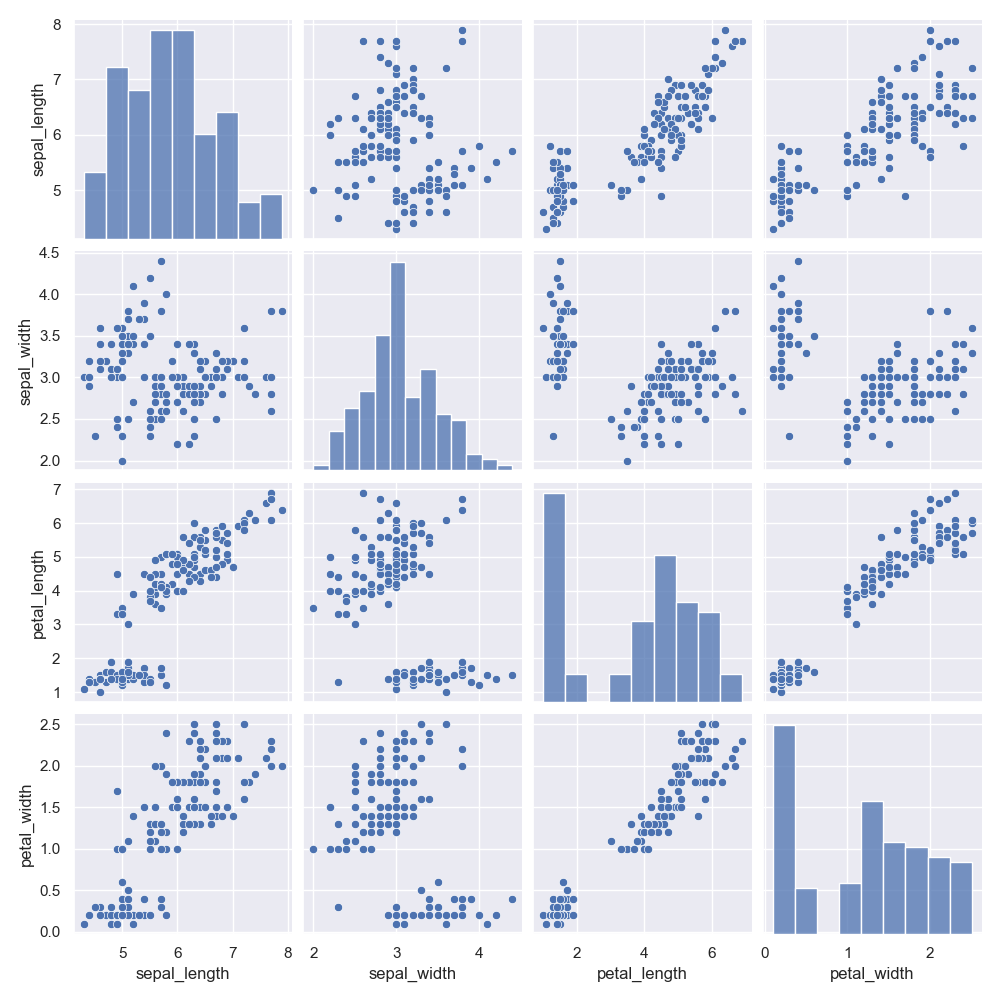

In [30]:
#fig, ax = plt.subplots(figsize=(8, 5))
sns.pairplot(iris)

In [45]:
km = KMeans(n_clusters=2)
predicted_clusters_km = km.fit_predict(iris) 

In [42]:
predicted_clusters_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<IPython.core.display.Javascript object>


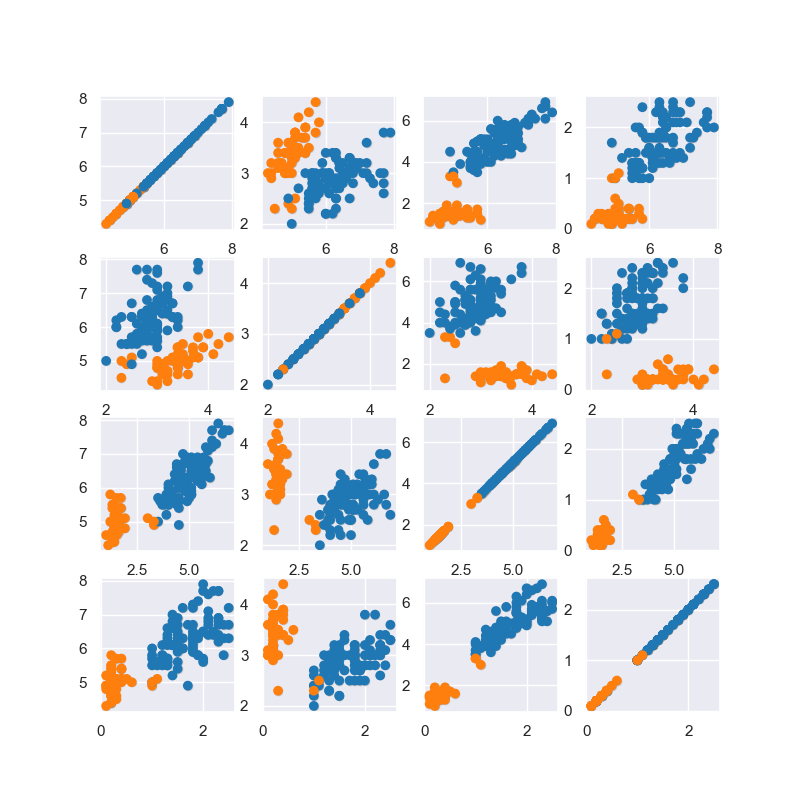

In [46]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for ii, col in enumerate(iris.columns):
    for kk, col2 in enumerate(iris.columns):
        axs[ii, kk].scatter(iris.loc[:, col].values, iris.loc[:, col2].values, c='gray', alpha=0.3)
        axs[ii, kk].scatter(iris.loc[:, col].values, iris.loc[:, col2].values, c=colors[predicted_clusters_km])

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## y is the ground truth input 
## species string as 0, 1, 2

def plant_clustering(df, y_true, n_clusters=3):
    
    km = KMeans(n_clusters)
    predicted = km.fit_predict(df)
    centers = km.cluster_centers_
    acc_score = accuracy_score(y_true, predicted)
    
    return acc_score   

In [ ]:
y_truth = list()
for yt, _ in enumerate(species.unique):
    # iterate thorugh species and assign index
    

 Apply k-means clustering with 3 clusters. Create a function plant_clustering that loads the iris data set, clusters the data and returns the accuracy_score.


#from sklearn.metrics import accuracy_score


In [18]:
km = KMeans(n_clusters=3)
predicted_clusters_km = kmeans.fit_predict(iris) 

### References 
- https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm
